# Exercises

In this exercise we will look at how substitution affects the vibrational frequencies, IR, and Raman spectra.

In [1]:
import veloxchem as vlx
import py3Dmol as p3d
from veloxchem.veloxchemlib import bohr_in_angstroms
from matplotlib import pyplot as plt
import numpy as np

basis_set_label = "6-31G"

In [2]:
ethene_xyz = """6
 ethene
 C          0.000000    -0.663984   0.000000
 C          0.000000     0.663984   0.000000
 H          0.919796    -1.223061   0.000000
 H         -0.919796    -1.223061   0.000000
 H          0.919796     1.223061   0.000000
 H         -0.919796     1.223061   0.000000
"""
ethene = vlx.Molecule.from_xyz_string(ethene_xyz)
ethene_basis = vlx.MolecularBasis.read(ethene, basis_set_label)

In [3]:
fluoroethene_xyz = """6
fluoroethene
 C          0.000000    -0.663984   0.000000
 C          0.000000     0.663984   0.000000
 F         1.519796    -1.223061   0.000000
 H         -0.919796    -1.223061   0.000000
 H          0.919796     1.223061   0.000000
 H         -0.919796     1.223061   0.000000
 """
fluoroethene = vlx.Molecule.from_xyz_string(fluoroethene_xyz)
fluoroethene_basis = vlx.MolecularBasis.read(fluoroethene, basis_set_label)

In [4]:
chloroethene_xyz = """6
chloroethene
 C          0.000000    -0.663984   0.000000
 C          0.000000     0.663984   0.000000
 Cl         1.519796    -1.223061   0.000000
 H         -0.919796    -1.223061   0.000000
 H          0.919796     1.223061   0.000000
 H         -0.919796     1.223061   0.000000
 """
chloroethene = vlx.Molecule.from_xyz_string(chloroethene_xyz)
chloroethene_basis = vlx.MolecularBasis.read(chloroethene, basis_set_label)

In [5]:
view = p3d.view(linked=True, viewergrid=(1,3),width=500,height=300)
view.addModel(ethene_xyz, 'xyz', viewer=(0,0))
view.addModel(fluoroethene_xyz, 'xyz', viewer=(0,1))
view.addModel(chloroethene_xyz, 'xyz', viewer=(0,2))
view.setStyle({'stick': {}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## SCF geometry optimization
Before we can calculate the vibrational spectra, we first must optimize the geometries.

In [6]:
# Settings for SCF and gradient drivers
scf_settings = {'conv_thresh':1e-6}
method_settings = {}
grad_settings = {'numerical': 'no'}

In [7]:
ethene_scfdrv = vlx.ScfRestrictedDriver()
ethene_scfdrv.update_settings(scf_settings, method_settings)
ethene_scfdrv.ostream.state = False 
ethene_scfdrv.compute(ethene, ethene_basis)

fluoroethene_scfdrv = vlx.ScfRestrictedDriver()
fluoroethene_scfdrv.update_settings(scf_settings, method_settings)
fluoroethene_scfdrv.ostream.state = False
fluoroethene_scfdrv.compute(fluoroethene, fluoroethene_basis)

chloroethene_scfdrv = vlx.ScfRestrictedDriver()
chloroethene_scfdrv.update_settings(scf_settings, method_settings)
chloroethene_scfdrv.ostream.state = False
chloroethene_scfdrv.compute(chloroethene, chloroethene_basis)

```python
# Set up the gradient and optimization dirvers:
ethene_grad_drv = vlx.ScfGradientDriver(ethene_scfdrv)
ethene_grad_drv.update_settings(grad_settings, method_settings)
ethene_opt_drv = vlx.OptimizationDriver(ethene_grad_drv)

fluoroethene_grad_drv = vlx.ScfGradientDriver(fluoroethene_scfdrv)
fluoroethene_grad_drv.update_settings(grad_settings, method_settings)
fluoroethene_opt_drv = vlx.OptimizationDriver(fluoroethene_grad_drv)

chloroethene_grad_drv = vlx.ScfGradientDriver(chloroethene_scfdrv)
chloroethene_grad_drv.update_settings(grad_settings, method_settings)
chloroethene_opt_drv = vlx.OptimizationDriver(chloroethene_grad_drv)
```

```python
# Optimize the geometries
opt_ethene = ethene_opt_drv.compute(ethene, ethene_basis)
opt_fluoroethene = fluoroethene_opt_drv.compute(fluoroethene, fluoroethene_basis)
opt_chloroethene = chloroethene_opt_drv.compute(chloroethene, chloroethene_basis)
```

In [8]:
def get_xyz(molecule):
    natm = molecule.number_of_atoms()
    elements = molecule.get_labels()
    coords = molecule.get_coordinates() * bohr_in_angstroms()
    txt = "%d\n\n" % natm
    for i in range(natm):
        txt += elements[i] + " %15.7f %15.7f %15.7f\n" % (coords[i,0], coords[i,1], coords[i,2])
    return txt

In [9]:
# Or read optimized geometries from file:
opt_ethene_xyz = open("../xyz/ir_raman/opt_ethene.xyz", "r").read() # read optimized geometry from file
opt_fluoroethene_xyz = open("../xyz/ir_raman/opt_fluoroethene.xyz", "r").read() # read optimized geometry from file
opt_chloroethene_xyz = open("../xyz/ir_raman/opt_chloroethene.xyz", "r").read() # read optimized geometry from file

opt_ethene = vlx.Molecule.from_xyz_string(opt_ethene_xyz)
ethene_basis = vlx.MolecularBasis.read(opt_ethene, basis_set_label)

opt_fluoroethene = vlx.Molecule.from_xyz_string(opt_fluoroethene_xyz)
fluoroethene_basis = vlx.MolecularBasis.read(opt_fluoroethene, basis_set_label)

opt_chloroethene = vlx.Molecule.from_xyz_string(opt_chloroethene_xyz)
chloroethene_basis = vlx.MolecularBasis.read(opt_chloroethene, basis_set_label)

In [10]:
view = p3d.view(linked=True, viewergrid=(1,3),width=500,height=300)
view.addModel(opt_ethene_xyz, 'xyz', viewer=(0,0))
view.addModel(opt_fluoroethene_xyz, 'xyz', viewer=(0,1))
view.addModel(opt_chloroethene_xyz, 'xyz', viewer=(0,2))
view.setStyle({'stick': {}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
ethene_scfdrv.compute(opt_ethene, ethene_basis)
fluoroethene_scfdrv.compute(opt_fluoroethene, fluoroethene_basis)
chloroethene_scfdrv.compute(opt_chloroethene, chloroethene_basis)

## Hessians

In [12]:
# Now let's calculate the IR and Raman spectra for these optimized geometries
hessian_settings = {'numerical': 'yes', 'do_raman': 'yes', 'print_depolarization_ratio':'no',
                    'numerical_grad': 'no', 'do_print_hessian': 'no', 'do_four_point': 'no'}

In [13]:
ethene_hessian_drv = vlx.scfhessiandriver.ScfHessianDriver(ethene_scfdrv)
ethene_hessian_drv.update_settings(method_settings, hessian_settings)

fluoroethene_hessian_drv = vlx.scfhessiandriver.ScfHessianDriver(fluoroethene_scfdrv)
fluoroethene_hessian_drv.update_settings(method_settings, hessian_settings)

chloroethene_hessian_drv = vlx.scfhessiandriver.ScfHessianDriver(chloroethene_scfdrv)
chloroethene_hessian_drv.update_settings(method_settings, hessian_settings)

```python
# Compute the Hessians:
ethene_hessian_drv.compute(ethene, ethene_basis)
fluoroethene_hessian_drv.compute(fluoroethene, fluoroethene_basis)
chloroethene_hessian_drv.compute(chloroethene, chloroethene_basis)
```

In [14]:
# Or read them from file:
import h5py

fname = '../h5files/ir_raman/ethenes.h5'
hf = h5py.File(fname, "r")

labels = ['ethene', 'fluoroethene', 'chloroethene']

i = 0   
for driver in [ethene_hessian_drv, fluoroethene_hessian_drv, chloroethene_hessian_drv]:
    label = labels[i]
    
    driver.hessian = np.array(hf.get(label+'_hessian')) 
    driver.polarizability_gradient = np.array(hf.get(label+'_polgrad')) 
    driver.dipole_gradient = np.array( hf.get(label+'_dipolegrad'))
    
    i += 1

hf.close()

In [15]:
def add_broadening(list_ex_energy, list_osci_strength, line_profile='Lorentzian', line_param=10, step=10):
        x_min = np.amin(list_ex_energy) - 50
        x_max = np.amax(list_ex_energy) + 50
        x = np.arange(x_min, x_max, step)
        y = np.zeros((len(x)))
        #print(x)
        #print(y)

        # go through the frames and calculate the spectrum for each frame
        for xp in range(len(x)):
            for e, f in zip(list_ex_energy, list_osci_strength):
                if line_profile == 'Gaussian':
                    y[xp] += f * np.exp(-(
                        (e - x[xp]) / line_param)**2)
                elif line_profile == 'Lorentzian':
                    y[xp] += 0.5 * line_param * f / (np.pi * (
                        (x[xp] - e)**2 + 0.25 * line_param**2))
        return x, y

        
# To animate the normal mode we will need both the geometry and the displacements 
def get_normal_mode(molecule, normal_mode):
    elements = molecule.get_labels()
    coords = molecule.get_coordinates() * bohr_in_angstroms() # To transform from au to A
    natm = molecule.number_of_atoms()
    vib_xyz = "%d\n\n" % natm
    nm = normal_mode.reshape(natm, 3)
    for i in range(natm):
        # add coordinates:
        vib_xyz += elements[i] + " %15.7f %15.7f %15.7f " % (coords[i,0], coords[i,1], coords[i,2])
        # add displacements:
        vib_xyz += "%15.7f %15.7f %15.7f\n" % (nm[i,0], nm[i,1], nm[i,2])
    return vib_xyz

## Vibrational analysis

In [16]:
ethene_hessian_drv.vibrational_analysis(opt_ethene)

                                                   Vibrational Analysis                                                   
                                                                                                                          
                 Harmonic frequencies (in cm**-1), force constants (in mdyne/A), reduced masses (in amu),                 
                          IR intensities (in km/mol), Raman scattering activities (in A**4/amu),                          
                                         and Cartesian normal mode displacements.                                         
                                                                                                                          
                                                                                                                          
  Index:                        1                              2                              3               
  Frequency:                

In [17]:
fluoroethene_hessian_drv.vibrational_analysis(opt_fluoroethene)

                                                   Vibrational Analysis                                                   
                                                                                                                          
                 Harmonic frequencies (in cm**-1), force constants (in mdyne/A), reduced masses (in amu),                 
                          IR intensities (in km/mol), Raman scattering activities (in A**4/amu),                          
                                         and Cartesian normal mode displacements.                                         
                                                                                                                          
                                                                                                                          
  Index:                        1                              2                              3               
  Frequency:                

In [18]:
chloroethene_hessian_drv.vibrational_analysis(opt_chloroethene)

                                                   Vibrational Analysis                                                   
                                                                                                                          
                 Harmonic frequencies (in cm**-1), force constants (in mdyne/A), reduced masses (in amu),                 
                          IR intensities (in km/mol), Raman scattering activities (in A**4/amu),                          
                                         and Cartesian normal mode displacements.                                         
                                                                                                                          
                                                                                                                          
  Index:                        1                              2                              3               
  Frequency:                

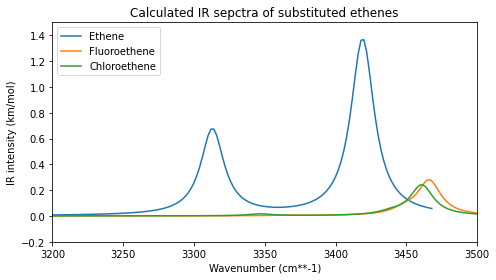

In [19]:
# plot the IR spectra
plt.figure(figsize=(7,4))

eth_x, eth_ir = ethene_hessian_drv.frequencies, ethene_hessian_drv.ir_intensities
flo_x, flo_ir = fluoroethene_hessian_drv.frequencies, fluoroethene_hessian_drv.ir_intensities
chl_x, chl_ir = chloroethene_hessian_drv.frequencies, chloroethene_hessian_drv.ir_intensities

eth_xl, eth_irl = add_broadening(eth_x, eth_ir, line_profile='Lorentzian', line_param=20, step=2)
flo_xl, flo_irl = add_broadening(flo_x, flo_ir, line_profile='Lorentzian', line_param=20, step=2)
chl_xl, chl_irl = add_broadening(chl_x, chl_ir, line_profile='Lorentzian', line_param=20, step=2)

plt.plot(eth_xl, eth_irl, label='Ethene')
plt.plot(flo_xl, flo_irl, label='Fluoroethene')
plt.plot(chl_xl, chl_irl, label='Chloroethene')

plt.xlabel('Wavenumber (cm**-1)')
plt.axis(xmin=3200, xmax=3500)
plt.axis(ymin=-0.2, ymax=1.5)
plt.ylabel('IR intensity (km/mol)')
plt.title("Calculated IR sepctra of substituted ethenes")
plt.legend()
plt.tight_layout(); plt.show()

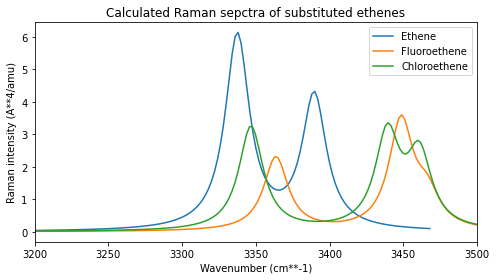

In [20]:
# plot the IR spectra
plt.figure(figsize=(7,4))

eth_r = ethene_hessian_drv.raman_intensities
flo_r = fluoroethene_hessian_drv.raman_intensities
chl_r = chloroethene_hessian_drv.raman_intensities

eth_xl, eth_rl = add_broadening(eth_x, eth_r, line_profile='Lorentzian', line_param=20, step=2)
flo_xl, flo_rl = add_broadening(flo_x, flo_r, line_profile='Lorentzian', line_param=20, step=2)
chl_xl, chl_rl = add_broadening(chl_x, chl_r, line_profile='Lorentzian', line_param=20, step=2)

plt.plot(eth_xl, eth_rl, label='Ethene')
plt.plot(flo_xl, flo_rl, label='Fluoroethene')
plt.plot(chl_xl, chl_rl, label='Chloroethene')

plt.xlabel('Wavenumber (cm**-1)')
plt.axis(xmin=3200, xmax=3500)
#plt.axis(ymin=-0.2, ymax=1.5)
plt.ylabel('Raman intensity (A**4/amu)')
plt.title("Calculated Raman sepctra of substituted ethenes")
plt.legend()
plt.tight_layout(); plt.show()

In [21]:
ethene_h1 = get_normal_mode(ethene, ethene_hessian_drv.normal_modes[-1])
fluoroethene_h1 = get_normal_mode(fluoroethene, fluoroethene_hessian_drv.normal_modes[-1])
chloroethene_h1 = get_normal_mode(chloroethene, chloroethene_hessian_drv.normal_modes[-1])

In [22]:
view = p3d.view(viewergrid=(1,1), width=300, height=200, linked=True)
view.addModel(ethene_h1, "xyz", {'vibrate': {'frames':10,'amplitude':0.75}}, viewer=(0,0))
view.setStyle({'stick':{}})
view.animate({'loop': 'backAndForth'})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## IR intensities and Raman activities

To rationalize why the IR and Raman spectra look as they do, let's calculate how the dipole moment and polarizability change during particular vibrational motions.